# Analysis of UK LCM

Notebook to develop teaching materials to analyse landscape change with raster data. [UK LCM data](https://www.ceh.ac.uk/ukceh-land-cover-maps) as a case study. 

Aim 1: reproduce the LCM change 1990-2015 map product (five layers as described in Land_cover_change_dataset_document_2ndJuly2020.pdf) for a subsection of UK (otherwise files too large for students?)

Aim 2: summarise land use/cover and LUCC for areal zones 



Use West of England Green Infrastructure Areas as a case study? As used in the following reports

1. https://www.westofengland-ca.gov.uk/west-of-england-joint-green-infrastructure-strategy/ 
2. https://forestofavontrust.org/forest-of-avon-plan/

Downloaded data from Edina Digimap:
- LCM 1990 (1km and 25m)
- LCM 2015 (1km and 25m)
- [LCC 1990-2015 (25m)](https://www.ceh.ac.uk/services/land-cover-change-1990-2015) - this contains 6 class, simplified maps


Likely need to use:
- [rioxarray](https://corteva.github.io/rioxarray/stable/)
- some [raster algebra](https://automating-gis-processes.github.io/CSC/notebooks/L5/raster-map-algebra.html)
- could go back to [base GDAL](https://www.youtube.com/watch?v=iBrB2bdxUlw)?



In [96]:
!pip install rioxarray

In [97]:
import rioxarray as rxr

In [98]:
# https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html
lcm90_1km = rxr.open_rasterio("data/WoE/GI-Areas/lcm-1990-1km_4137015/dominant_value/LCM1990GBDOMINANT_.tif")

In [99]:
type(lcm90_1km)

xarray.core.dataarray.DataArray

In [100]:
lcm90_1km

<xarray.DataArray (band: 1, y: 1300, x: 700)>
[910000 values with dtype=uint8]
Coordinates:
  * band         (band) int64 1
  * y            (y) float64 1.299e+06 1.298e+06 1.297e+06 ... 2e+03 1e+03 0.0
  * x            (x) float64 1e+03 2e+03 3e+03 4e+03 ... 6.98e+05 6.99e+05 7e+05
    spatial_ref  int64 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0
    grid_mapping:  spatial_ref

Do we need to worry about nodata? Probably not for LCM data, but might be useful in future. See:
- https://corteva.github.io/rioxarray/stable/rioxarray.html?highlight=write_nodata#rioxarray.raster_array.RasterArray.write_nodata
- https://corteva.github.io/rioxarray/stable/getting_started/nodata_management.html

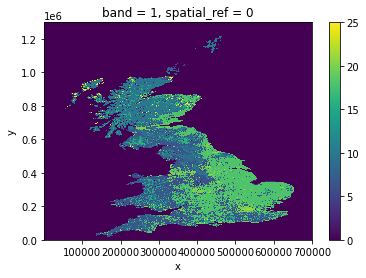

In [101]:
lcm90_1km.plot()

In [102]:
# https://corteva.github.io/rioxarray/stable/getting_started/crs_management.html
lcm90_1km.rio.crs

CRS.from_wkt('PROJCS["OSGB 1936 / British National Grid",GEOGCS["OSGB 1936",DATUM["OSGB_1936",SPHEROID["Airy 1830",6377563.396,299.324964600004,AUTHORITY["EPSG","7001"]],AUTHORITY["EPSG","6277"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4277"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",49],PARAMETER["central_meridian",-2],PARAMETER["scale_factor",0.9996012717],PARAMETER["false_easting",400000],PARAMETER["false_northing",-100000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]')

In [103]:
lcm90_1km.rio.bounds()

(500.0, -500.0, 700500.0, 1299500.0)

In [104]:
lcm90_1km.rio.resolution()

(1000.0, -1000.0)

In [105]:
lcm90_1km.rio.nodata

In [106]:
lcm90_1km.rio.write_nodata(0, inplace=True)

<xarray.DataArray (band: 1, y: 1300, x: 700)>
[910000 values with dtype=uint8]
Coordinates:
  * band         (band) int64 1
  * y            (y) float64 1.299e+06 1.298e+06 1.297e+06 ... 2e+03 1e+03 0.0
  * x            (x) float64 1e+03 2e+03 3e+03 4e+03 ... 6.98e+05 6.99e+05 7e+05
    spatial_ref  int64 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0
    grid_mapping:  spatial_ref
    _FillValue:    0

In [107]:
lcm90_1km.rio.nodata

0

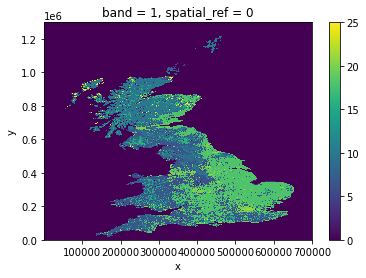

In [108]:
lcm90_1km.plot()

In [109]:
woe_minx = 100000
woe_miny = 100000
woe_maxx = 450000
woe_maxy = 450000

In [110]:
# https://corteva.github.io/rioxarray/stable/examples/clip_box.html
lcm90_1km_woe = lcm90_1km.rio.clip_box(
    minx=woe_minx,
    miny=woe_miny,
    maxx=woe_maxx,
    maxy=woe_maxy
)

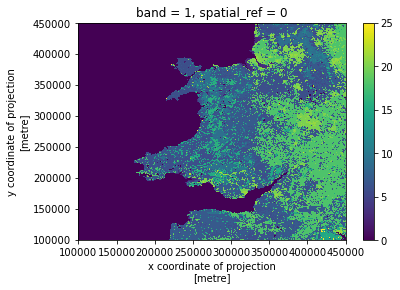

In [111]:
lcm90_1km_woe.plot()

In [112]:
lcm90_1km_woe_slice = lcm90_1km.rio.slice_xy(
    minx=woe_minx,
    miny=woe_miny,
    maxx=woe_maxx,
    maxy=woe_maxy
)

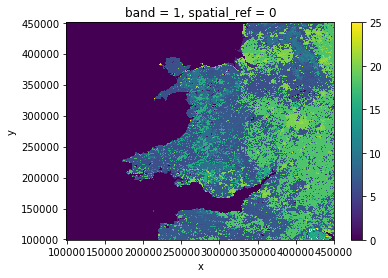

In [113]:
lcm90_1km_woe_slice.plot()

In [114]:
lcm90_25m = rxr.open_rasterio("data/WoE/GI-Areas/lcm-1990-25m_4137016/gb1990lcm25m.tif")

In [115]:
print(type(lcm90_25m))
print(lcm90_25m.rio.crs)
print(lcm90_25m.rio.bounds())
print(lcm90_25m.rio.resolution())
print(lcm90_25m.rio.count)

<class 'xarray.core.dataarray.DataArray'>
EPSG:27700
(0.0, 0.0, 700000.0, 1300000.0)
(25.0, -25.0)
3


In [116]:
lcm90_25m[1].rio.count

1

In [117]:
woe_minx = 325000
woe_miny = 140000
woe_maxx = 380000
woe_maxy = 200000

# https://corteva.github.io/rioxarray/stable/examples/clip_box.html
lcm90_25m_woe = lcm90_25m.rio.clip_box(
    minx=woe_minx,
    miny=woe_miny,
    maxx=woe_maxx,
    maxy=woe_maxy
)

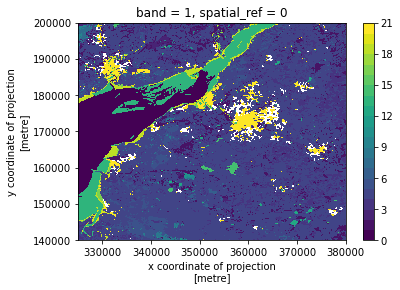

In [118]:
lcm90_25m_woe[0].plot(cmap="viridis", levels=22)  #use a more appropriate palette
#see here for plotting categoricals https://carpentries-incubator.github.io/geospatial-python/aio/index.html

In [121]:
lcm90_25m_dom = lcm90_25m[0]


lcm90_25m_dom.rio.write_nodata(0,inplace=True)

<xarray.DataArray (y: 52000, x: 28000)>
[1456000000 values with dtype=uint8]
Coordinates:
    band         int64 1
  * y            (y) float64 1.3e+06 1.3e+06 1.3e+06 1.3e+06 ... 62.5 37.5 12.5
  * x            (x) float64 12.5 37.5 62.5 87.5 ... 6.999e+05 7e+05 7e+05
    spatial_ref  int64 0
Attributes:
    _FillValue:    0
    scale_factor:  1.0
    add_offset:    0.0
    grid_mapping:  spatial_ref

In [122]:
# https://corteva.github.io/rioxarray/stable/examples/clip_box.html
lcm90_25m_dom_woe = lcm90_25m_dom.rio.clip_box(
    minx=woe_minx,
    miny=woe_miny,
    maxx=woe_maxx,
    maxy=woe_maxy
)

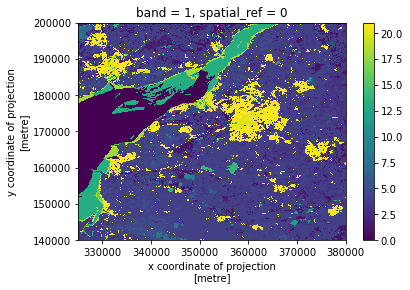

In [123]:
lcm90_25m_dom_woe.plot()

In [124]:
lcm90_25m_dom_woe

<xarray.DataArray (y: 2400, x: 2200)>
[5280000 values with dtype=uint8]
Coordinates:
    band         int64 1
  * y            (y) float64 2e+05 2e+05 1.999e+05 ... 1.401e+05 1.4e+05 1.4e+05
  * x            (x) float64 3.25e+05 3.25e+05 3.251e+05 ... 3.8e+05 3.8e+05
    spatial_ref  int64 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0
    grid_mapping:  spatial_ref
    _FillValue:    0

## Reclassify

See https://www.earthdatascience.org/courses/use-data-open-source-python/intro-raster-data-python/raster-data-processing/classify-plot-raster-data-in-python/

Useful stuff here: https://carpentries-incubator.github.io/geospatial-python/aio/index.html

Note there are different `.where` functions in the `xarray` library:
1. [xr.where](https://xarray.pydata.org/en/stable/generated/xarray.where.html) takes a condition, a value to set if the conditions is true and a value to set if the condition is false
2. [xr.DataArray.where](https://xarray.pydata.org/en/stable/generated/xarray.DataArray.where.html) takes a condition to specify locations in the array at which to preserve the original value, a value to set when the condition is false, and an option to set values to NaN (rather than preserving the original value)

We will use the latter here to re-classify our maps. 

First as a proof of concept, let's try this on a small `DataArray` we generate ourselves: 

In [125]:
import numpy as np
import xarray as xr
a = xr.DataArray(np.arange(25).reshape(5, 5), dims=("x", "y"))
a

<xarray.DataArray (x: 5, y: 5)>
array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])
Dimensions without coordinates: x, y

We'll create a copy of this original `DataArray` to hold the new re-classified map. 

In [126]:
b=a.copy(deep=True)  #read more about deep vs shallow copies here https://realpython.com/copying-python-objects/

Before trying to re-classify multuple values, let's visualise the logic of the `DataArray.where` method: 

In [127]:
b=b.where(cond=a < 5, other=-1)
b

<xarray.DataArray (x: 5, y: 5)>
array([[ 0,  1,  2,  3,  4],
       [-1, -1, -1, -1, -1],
       [-1, -1, -1, -1, -1],
       [-1, -1, -1, -1, -1],
       [-1, -1, -1, -1, -1]])
Dimensions without coordinates: x, y

Check you understand what is happening here:
- *where* locations in `a` have a value `< 5` their value remains unchanged
- in *other* locations the value is set to `-1`
- the result is assigned to `DataArray` `b`

We'll use similar logic for our map re-classification, except:
1. we will use an 'inverse' condition
2. we'll use a loop to apply the `where` method multiple times for different conditions

First, what do we mean by an 'inverse' condition. Well, in our re-classification we want to change only locations with a specific, not all locations that do not match that value. Because the `DataArray.where` method assumes you want to change values not meeting your condition (remember it _"takes a condition to specify locations in the array at which to **preserve the original value**"_ ), we need to use `!=` to specify the condition for locations at which to change value. 

For example, to change only the location that has value `5`:

In [128]:
b=a.copy(deep=True) 
b=b.where(cond=a != 5, other=-1)
b

<xarray.DataArray (x: 5, y: 5)>
array([[ 0,  1,  2,  3,  4],
       [-1,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])
Dimensions without coordinates: x, y

That's slightly counter intuitive, huh!?. (If you don't quite get it at this point, just go with the fact that we need to use `!=` *not* `==` and come back to it later.). 

Now, to reclassify multiple values we'll [loop over a dictionary](https://www.w3schools.com/python/gloss_python_loop_dictionary_items.asp).

The dictionary will hold *old:new* `key:value` pairs:  

In [129]:
d = {5: -1, 17: -2, 11: -3, 23:-4}

In this dictionary each `key` is the land cover class in the original ( _old_ ) map that we want to change and the corresponding `value` is the land cover class we want to set in the re-classified ( _new_ ) map.  

So now, to do a re-classification of multiple values:

In [130]:
b=a.copy(deep=True) 

for old, new in d.items(): 
    b=b.where(a != old, new)

b

<xarray.DataArray (x: 5, y: 5)>
array([[ 0,  1,  2,  3,  4],
       [-1,  6,  7,  8,  9],
       [10, -3, 12, 13, 14],
       [15, 16, -2, 18, 19],
       [20, 21, 22, -4, 24]])
Dimensions without coordinates: x, y

Here we use a [for loop](https://www.w3schools.com/python/python_for_loops.asp) over the dictionary. In each iteration of the the look, `where` values in `a` are not equal to `old` (the *key*) we preserve the original value and change everything else to `new` (the *value*), assigning the result to `b`.

Adding some annotations to each loop may help to understand:

In [131]:
b=a.copy(deep=True) 

for old, new in d.items(): 
    print("Changing ", old, " to ", new)
    b=b.where(a != old, new)

print("\nre-classified map:")    
b

Changing  5  to  -1
Changing  17  to  -2
Changing  11  to  -3
Changing  23  to  -4

re-classified map:


<xarray.DataArray (x: 5, y: 5)>
array([[ 0,  1,  2,  3,  4],
       [-1,  6,  7,  8,  9],
       [10, -3, 12, 13, 14],
       [15, 16, -2, 18, 19],
       [20, 21, 22, -4, 24]])
Dimensions without coordinates: x, y

In [152]:
d = {1:1,2:1,3:2,4:3,5:3,6:3,7:3,8:3,9:3,10:3,11:3,16:3,18:3,19:3,14:4,20:5,21:5,12:6,13:6,15:6,17:6}

newArray = lcm90_25m_dom_woe.copy(deep=True)

for old, new in d.items(): 
    newArray = newArray.where(lcm90_25m_dom_woe != old, new)  

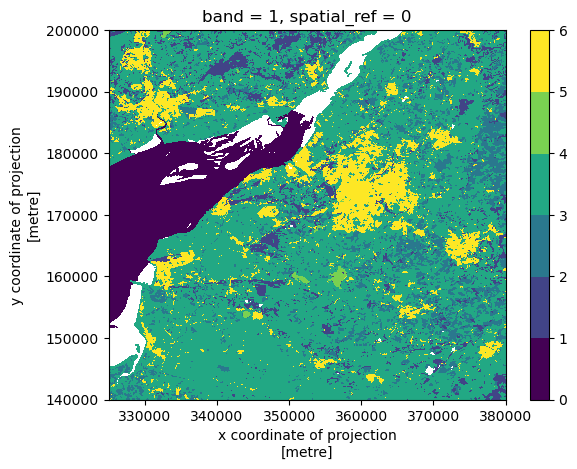

In [153]:
newArray.plot(cmap="viridis", levels=7)

In [154]:
from matplotlib.colors import ListedColormap

# Define color map of the map legend
lc6_colors = ["white", "darkgreen", "lightyellow", "lightgreen", "blue", "black", "grey"]
lc6_cmap = ListedColormap(lc6_colors)

# Define class names for the legend
lc6_names = [
    "No Data",
    "Woodland",
    "Cropland",
    "Grassland",
    "Water",
    "Built-up",
    "Other"
]

# we need to know in what order the legend items should be arranged
lc6_indices = list(range(len(lc6_names)))

In [143]:
import matplotlib.pyplot as plt
!pip install earthpy
import earthpy.plot as ep

     |████████████████████████████████| 1.4 MB 4.6 MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for earthpy: filename=earthpy-0.9.2-py3-none-any.whl size=1365097 sha256=1578cc63d32c647809a7f0a4f4ac821f945d9be83634687f6ca2e7385bddea5c
  Stored in directory: /home/james/.cache/pip/wheels/c3/02/7a/1fe4f9b993cf451f1c9f22f0ea9659481408b9478e4a3bd237
Successfully built earthpy


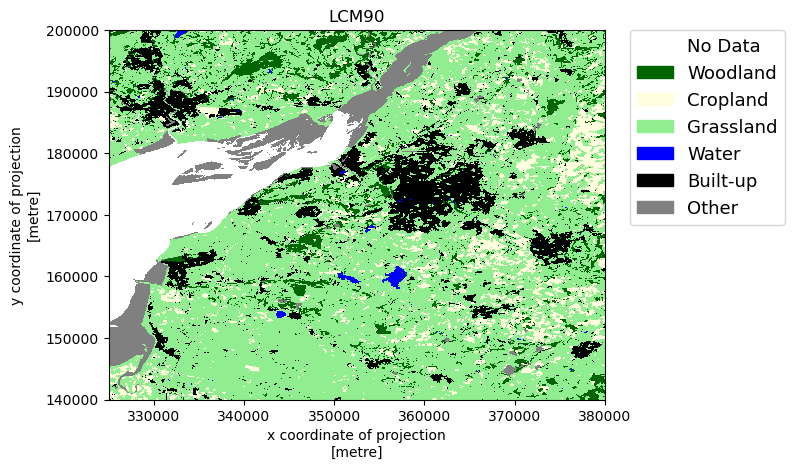

In [155]:
#Making the plot
plt.style.use("default")
plt.figure()
im = newArray.plot(cmap=lc6_cmap, add_colorbar=False)

ep.draw_legend(im_ax=im, classes = lc6_indices, titles=lc6_names) # earthpy helps us by drawing a legend given an existing image plot and legend items, plus indices
plt.title("LCM90")
plt.ticklabel_format(style="plain")

In [103]:
lcm15_25m = rxr.open_rasterio("data/WoE/GI-Areas/lcm-2015-25m_4137018/lcm2015gb25m.tif")
lcm15_25m_dom = lcm15_25m[0]

In [104]:
# https://corteva.github.io/rioxarray/stable/examples/clip_box.html
lcm15_25m_dom_woe = lcm15_25m_dom.rio.clip_box(
    minx=woe_minx,
    miny=woe_miny,
    maxx=woe_maxx,
    maxy=woe_maxy
)

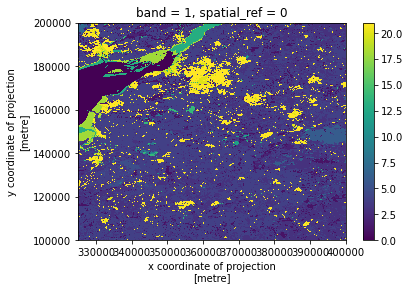

In [105]:
lcm15_25m_dom_woe.plot()

Be aware of data loss

https://corteva.github.io/rioxarray/stable/getting_started/manage_information_loss.html

Writing data

In [114]:
# https://corteva.github.io/rioxarray/stable/rioxarray.html#rioxarray.raster_dataset.RasterDataset.to_raster
lcm90_25m_dom_woe.rio.to_raster("data/WoE/GI-Areas/lcm-1990-25m_4137016/gb1990lcm25m_dom_woe.tif")

Read back in

In [115]:
lcm90_25m_dom_woe2 = rxr.open_rasterio("data/WoE/GI-Areas/lcm-1990-25m_4137016/gb1990lcm25m_dom_woe.tif")

In [116]:
print(type(lcm90_25m))
print(lcm90_25m_dom_woe2.rio.crs)
print(lcm90_25m_dom_woe2.rio.bounds())
print(lcm90_25m_dom_woe2.rio.resolution())
print(lcm90_25m_dom_woe2.rio.count)

<class 'xarray.core.dataarray.DataArray'>
EPSG:27700
(325000.0, 140000.0, 380000.0, 200000.0)
(25.0, -25.0)
1
